In [496]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [497]:
experiment = "01_Multiplication" # 506
experiment = "02_Compare" # 507|508|509
# experiment = "03_Share"
# experiment = "04_LogReg" # 526|527|528
# experiment = "05_Reveal" # 512
# experiment = "06_LeNet" # 529|530|531
# experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
# experiment = "11_Auction" # 521|522|523
# experiment = "12_VGG" # 532|533|534
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]
# framworks = ["MPyC", "HPMPC", "mp-slice", "MP-SPDZ"]

data = []
base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [498]:
import pandas as pd


In [499]:
# fl_paths[-1].split("/")[-2]

In [500]:
# runtime/3600

bandwidths(Mbs)
100      0.019992
1000     0.019992
10000    0.019992
25000    0.030000
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.030000
1000     0.019992
10000    0.019992
25000    0.019992
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.019992
1000     0.019992
10000    0.009984
25000    0.019992
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.019992
100      0.019992
1000     0.030000
10000    0.030000
25000    0.019992
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.019992
100      0.030000
1000     0.030000
10000    0.019992
25000    0.030000
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.030000
100      0.030000
1000     0.019992
10000    0.030000
25000    0.019992
Name: runtime_external(s), dtype: float64
10000
bandwidths(Mbs)
100      1.54
1000     0.40
10000    0.33
25000    0.34
Name: runtime_external(s), dtype: float64
10000
bandwidths(Mbs)
100      13.83
1000     

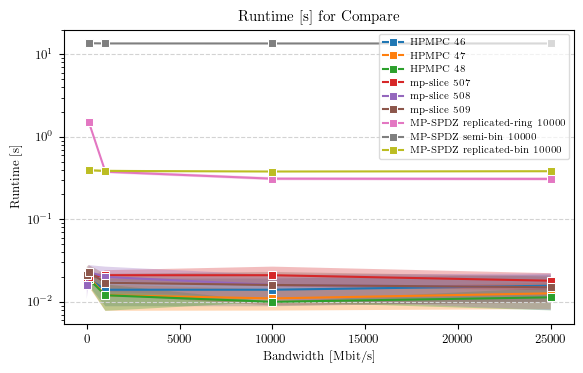

In [501]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[-2]
# del label[-2]
# label = ['HPMPC',
#          'mp-slice RCA',
#          'mp-slice PPA',
#          'mp-slice PPA4',
#          'MP-SPDZ replicated-ring honest maj.',
#          'MP-SPDZ semi2k dishonest maj.']

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # DIVISION
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

print(label)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

latencies(ms)
0     0.030000
25    1.650000
50    3.270000
75    4.899984
Name: runtime_external(s), dtype: float64
latencies(ms)
0     0.019992
25    0.390000
50    0.769992
75    1.140000
Name: runtime_external(s), dtype: float64
latencies(ms)
0     0.019992
25    0.240000
50    0.459984
75    0.690000
Name: runtime_external(s), dtype: float64
latencies(ms)
0    0.019992
Name: runtime_external(s), dtype: float64
latencies(ms)
0    0.03
Name: runtime_external(s), dtype: float64
latencies(ms)
0    0.019992
Name: runtime_external(s), dtype: float64
10000
latencies(ms)
0     0.34
25    3.26
50    6.11
75    8.96
Name: runtime_external(s), dtype: float64
10000
latencies(ms)
0      13.77
25    169.66
50    325.12
75    480.68
Name: runtime_external(s), dtype: float64
10000
latencies(ms)
0     0.40
25    2.33
50    4.18
75    6.04
Name: runtime_external(s), dtype: float64


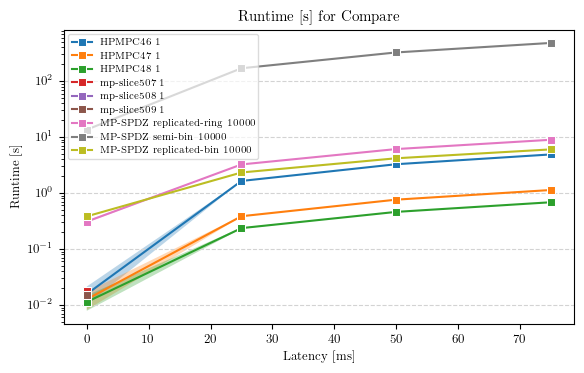

In [502]:
latency,label=rf.get_latency_deviation(data)
# del latency[0] # AUCTION
# del latency[1]
# del latency[2]
# del latency[-2]
# del latency[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del latency[-1]
# del label[-2]
# del latency[-2]

# del latency[3] # DIVISION
# del latency[3]
# del label[3]
# del label[3]

# del latency[-2] # secure min
# del latency[-2]
# del label[-2]
# del label[-2]

# del latency[-7] # LogReg
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# print(latency)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

packetdrops(%)
0     0.030000
1     3.259992
2     4.650000
5    11.190000
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.030000
1    3.060000
2    3.049992
5    8.799984
Name: runtime_external(s), dtype: float64
packetdrops(%)
0     0.019992
1     3.049992
2     6.499992
5    25.659984
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.03
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.03
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.03
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.34
1    2.33
2    5.04
5    9.41
Name: runtime_external(s), dtype: float64
packetdrops(%)
0     13.77
1     30.69
2     50.22
5    143.86
Name: runtime_external(s), dtype: float64
packetdrops(%)
0     0.40
1     3.85
2     2.08
5    11.00
Name: runtime_external(s), dtype: float64


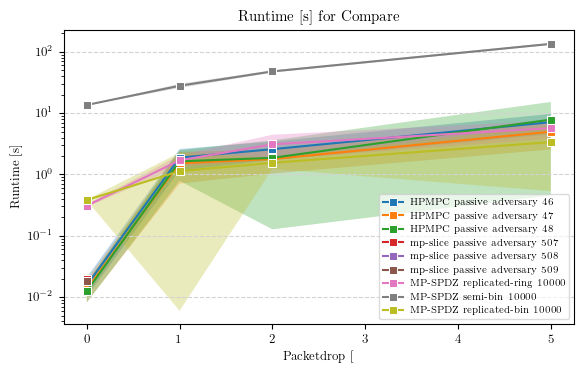

In [503]:
packetdrop,label=rf.get_packetdrop_deviation(data)
# del packetdrop[0] # AUCTION
# del packetdrop[1]
# del packetdrop[2]
# del packetdrop[-2]
# del packetdrop[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del packetdrop[-1]
# del label[-2]
# del packetdrop[-2]

# del packetdrop[3] # Division
# del packetdrop[3]
# del label[3]
# del label[3]

# del packetdrop[-2] # secure min
# del packetdrop[-2]
# del label[-2]
# del label[-2]
# print(packetdrop)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [%]","Runtime [s]",True)

In [504]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[2]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # Division
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]
[df['mean'].iloc[0] for df in bandwidth]

bandwidths(Mbs)
100      0.019992
1000     0.019992
10000    0.019992
25000    0.030000
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.030000
1000     0.019992
10000    0.019992
25000    0.019992
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.019992
1000     0.019992
10000    0.009984
25000    0.019992
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.019992
100      0.019992
1000     0.030000
10000    0.030000
25000    0.019992
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.019992
100      0.030000
1000     0.030000
10000    0.019992
25000    0.030000
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
0        0.030000
100      0.030000
1000     0.019992
10000    0.030000
25000    0.019992
Name: runtime_external(s), dtype: float64
10000
bandwidths(Mbs)
100      1.54
1000     0.40
10000    0.33
25000    0.34
Name: runtime_external(s), dtype: float64
10000
bandwidths(Mbs)
100      13.83
1000     

[0.0189912,
 0.019992,
 0.0189912,
 0.0189912,
 0.0159888,
 0.0209928,
 1.5310000000000001,
 13.672999999999998,
 0.394]

In [505]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.003164807482296514,
 0.004717816444076644,
 0.003164807482296514,
 0.0031648074822965143,
 0.005168108977179176,
 0.005681003291673047,
 0.012866839377079069,
 0.11624208455728169,
 0.009660917830792964]

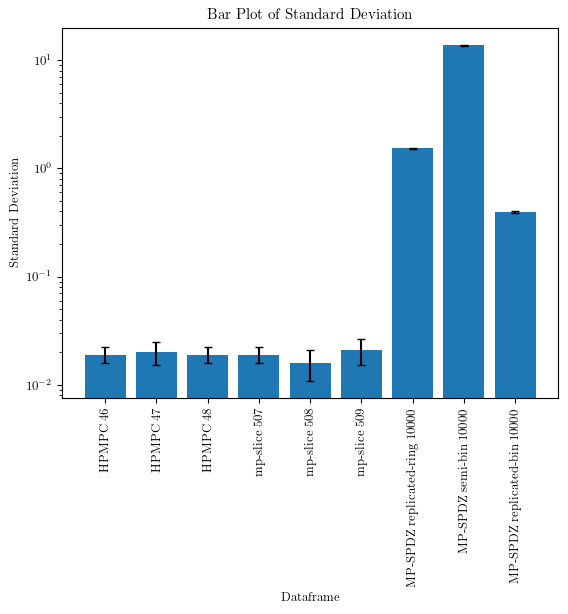

In [506]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


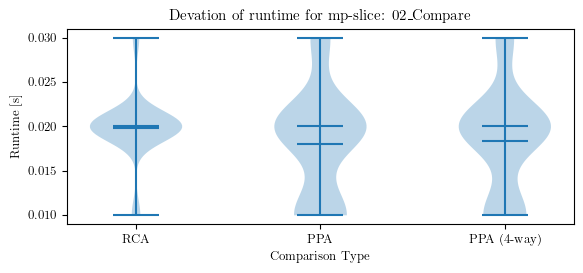

In [507]:
import seaborn as sns
import matplotlib.pyplot as plt
# Example data
fig, ax = plt.subplots()

pos = 1
deviation61 = data[pos].loc[(data[pos]['function'] == 507) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation62 = data[pos].loc[(data[pos]['function'] == 508)  & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation63 = data[pos].loc[(data[pos]['function'] == 509) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()

# Plot the first violin plot
two_dimensional_list = [deviation61, deviation62, deviation63]
ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# Set the x-tick labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])


# Set plot title and labels
plt.title(f"Devation of runtime for {framworks[pos]}: {experiment}")
plt.xlabel("Comparison Type")
plt.ylabel("Runtime [s]")
ax.figure.set_size_inches(5.91, 2.8)
fig.tight_layout()
plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
plt.show()